# Aggregation and Grouping

# 聚合與分組

> An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

對於一個大數據集進行分析的關鍵部分是使用有效的概括：對數據集進行`sum()`、`mean()`、`median()`、`min()`和`max()`聚合運算，這些運算的結果就可能可以給出大數據集的一些內在特徵。在本節中，我們會探討Pandas中的聚合，從我們已經在NumPy數組中進行過的那些簡單的操作，直到基於分組`groupby`概念進行的更複雜的操作。

## GroupBy: Split, Apply, Combine

## 分組：拆分、應用、組合

> Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

簡單的聚合可以提供數據集的基礎特徵，但是通常我們更希望依據一些標籤或索引條件進行聚合操作：這可以通過`groupby`操作實現。 "group by"的名稱來自於SQL，但是將它想成是由Hadley Wickham首先創造的R數據統計術語會更合適：*拆分(Split)、應用(Apply)、組合(Combine)*。

![](https://github.com/wangyingsm/Python-Data-Science-Handbook/raw/61f1a8f5b27e374f3eb50ea41efb73ac531ae539/notebooks/figures/03.08-split-apply-combine.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Split-Apply-Combine)

[附录：生成图像的源代码](06.00-Figure-Code.ipynb#Split-Apply-Combine)

> This makes clear what the ``groupby`` accomplishes:
> - The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
> - The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
> - The *combine* step merges the results of these operations into an output array.

上圖很清晰地展示了`groupby`完成的工作：

- 拆分: *split*步驟表示按照指定鍵上的值對`DataFrame`進行拆分和分組的功能。
- 應用: *apply*步驟表示在每個獨立的分組上調用某些函數進行計算，通常是 "聚合(Aggregate)、轉換(transform)、過濾(filter)"。
- 組合: *combine*步驟將上述計算的結果重新合併在一起輸出。

> While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

雖然這可以通過將前面介紹過的遮蓋、聚合和組合指令組合在一起來實現，`groupby`的一個重要的實現是*拆分的中間結果不需要真正的創建出來*。而且，`groupby`（通常）可以在一次過程中處理完所有的數據分組的總和、平均值、計數、最小是或其他聚合操作。 `groupby`的強大在於它將這些步驟抽象了出來：用戶不需要思考這些計算是*如何*進行的，只需要認為*這些操作是一個整體*。

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
planets.groupby('method').median()  #拆分+聚合

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875,2011.5
Eclipse Timing Variations,2.0,4343.500000,5.125,315.360,2010.0
Imaging,1.0,27500.000000,NaN,40.395,2009.0
Microlensing,1.0,3300.000000,NaN,3840.000,2010.0
Orbital Brightness Modulation,2.0,0.342887,NaN,1180.000,2011.0
Pulsar Timing,3.0,66.541900,NaN,1200.000,1994.0
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.0
Radial Velocity,1.0,360.200000,1.260,40.445,2009.0
Transit,1.0,5.714932,1.470,341.000,2012.0


> Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

上例中我們在原始的`DataFrame`中選擇了特定的`Series`，這個`Series`是按照提供的列名進行分組的。當然，`GroupBy`對像在調用聚合操作之前是不會進行計算的：

In [3]:
planets.groupby('method')['orbital_period'].median() #拆分 + 聚合

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Aggregate, filter, transform, apply

### 聚合、過濾、轉換、應用

> The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

前面的討論聚焦在組合操作相應的聚合函數上，但實際上還有更多的可能選項。特別是`GroupBy`對像有`aggregate()`、`filter()`、`transfrom()`和`apply()`方法，它們能在組合分組數據之前有效地實現大量有用的操作。

In [4]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(6),'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

### 1.Aggregation 聚合

> We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

我們已經熟悉了`GroupBy`使用`sum()`、`median()`等方法進行聚合的做法，但是`aggregate()`方法能提供更多的靈活性。它能接受字符串、函數或者一個列表，然後一次性計算出所有的聚合結果。下面是一個簡單的例子：

In [5]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [6]:
df.groupby('key').aggregate(['min', 'median', 'max'])
#df.groupby('key').aggregate(['np.min', 'np.median', 'np.max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

> Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

還可以將一個字典，裡面是列名與操作的對應關係，傳遞給`aggregate()`來進行一次性的聚合運算：

In [7]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### 2.Filtering 過濾

> A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

過濾操作能在分組數據上移除一些你不需要的數據。例如，我們可能希望保留標準差大於某個閾值的所有的分組：(`filter()`類似於SQL中的HAVING)

In [8]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [9]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


> The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

用來進行過濾的函數必須返回一個布爾值，表示分組是否能夠通過過濾條件。例中A分組的標準差不是大於4，因此整個分組A在結果中被移除了。

In [10]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### 3.Transformation 轉換

> While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

聚合返回的是分組簡化後的數據集，而轉換可以返回完整數據轉換後並重新合併的數據集。因此轉換操作的結果和輸入數據集具有相同的形狀。一個通用例子是將整個數據集通過減去每個分組的平均值進行中心化：

In [11]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [12]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [13]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### The apply() method  應用

> The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

`apply()`方法能讓你將分組的結果應用到任意的函數上。該函數必須接受一個`DataFrame`參數，返回一個Pandas對象（如`DataFrame`、`Series`）或者一個標量；組合操作會根據返回的類型進行適配。

> For example, here is an ``apply()`` that normalizes the first column by the sum of the second: ``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

例如，下面採用`apply()`使用`data2`的分組總和來正則化`data1`的值：`GroupBy`對象的`apply()`方法是非常靈活的：唯一的限制就是應用的函數要接受一個`DataFrame`參數並且返回一個Pandas對像或者標量；函數體內做什麼工作完全是自定義的。

In [14]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [15]:
df.groupby('key')['data2'].sum()

key
A     8
B     7
C    12
Name: data2, dtype: int64

In [16]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()  #A:8 B:7 C:12
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### Specifying the split key

### 指定拆分鍵

> In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

在前面的簡單例子中，我們使用一個列名對`DataFrame`進行拆分。這只是分組的眾多方式的其中之一，我們下面繼續探討其他的選項。

In [17]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [18]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


#### A list, array, series, or index providing the grouping keys 使用列表、數組、序列或索引指定分組鍵

> The key can be any series or list with a length matching that of the ``DataFrame``. For example:

分組使用的鍵可以使任何的序列或列表，只要長度和`DataFrame`的長度互相匹配即可。例如：

In [19]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


#### A dictionary or series mapping index to group 使用字典或映射索引的序列來分組

> Another method is to provide a dictionary that maps index values to the group keys:

還有一種方法是提供一個字典，將索引值映射成分組鍵：

In [20]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
 
df2.groupby(mapping).sum()                 # provide a dictionary 
df2.groupby(str.lower).mean()              # Any Python function 任何Python函數
df2.groupby([str.lower, mapping]).mean()   # combined to group on a multi-index

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## Example : Content
自 2008 年以來，房客和房東都在使用 Airbnb 來拓展旅行的可能性，並以更加獨特、個性化的方式體驗世界。 該數據集描述了 2019 年紐約市的房源活動和指標。這個公共數據集是 Airbnb 的一部分，原始來源可以在這個網站上找到。

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')

data = pd.read_csv("input/pd-NYC2019.csv") 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


### 房屋件數分布 (neighbourhood, neighbourhood_group)

In [22]:
data.groupby('neighbourhood').size()
data.groupby('neighbourhood_group').size()
# Brooklyn 和 Manhattan 的 airbnb 件數最多

neighbourhood_group
Bronx              31
Brooklyn         1344
Manhattan        1345
Queens            194
Staten Island      25
dtype: int64

Text(0, 0.5, 'Case Number')

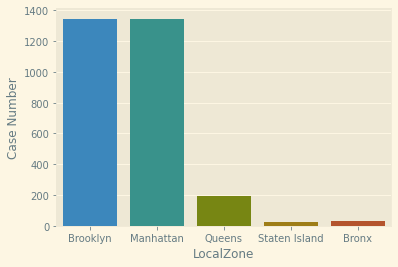

In [23]:
sns.countplot(x='neighbourhood_group', data=data)
plt.xlabel('LocalZone')
plt.ylabel('Case Number')

### 房屋平均價格 (mean)

In [24]:
# way1
#NG_price_s = data.groupby(by=['neighbourhood_group'])['price'].sum() 
#NG_price_c = data.groupby(by=['neighbourhood_group'])['price'].count() 
#NG_price = NG_price_s / NG_price_c

In [25]:
# way2
mm = data.groupby('neighbourhood_group')['price'].mean()              # 直接顯示無法製圖
mm = data.groupby('neighbourhood_group')['price'].mean().reset_index()  #reset_index()製成表格
mm

,neighbourhood_group,price
0,Bronx,70.000000
1,Brooklyn,144.888393
2,Manhattan,186.139033
3,Queens,98.268041
4,Staten Island,121.400000


Text(0, 0.5, 'Avg Price')

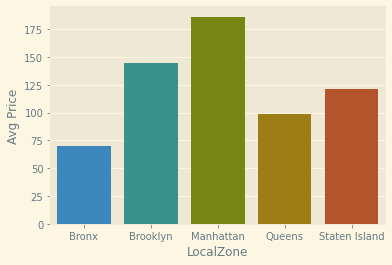

In [26]:
sns.barplot(x='neighbourhood_group', y='price', data=mm)
plt.xlabel('LocalZone')
plt.ylabel('Avg Price')

### 不同區域,房型的平均價格 (groupby)

In [27]:
avg_price = data.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()  #reset_index()製成表格
avg_price.head()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,106.000000
1,Bronx,Private room,52.857143
2,Brooklyn,Entire home/apt,182.353750
3,Brooklyn,Private room,90.191729
4,Brooklyn,Shared room,72.083333


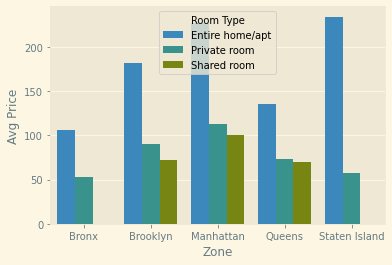

In [28]:
sns.barplot(x='neighbourhood_group', y='price', 
            hue='room_type',data=avg_price)

plt.xlabel('Zone')
plt.ylabel('Avg Price')
plt.legend(title='Room Type')

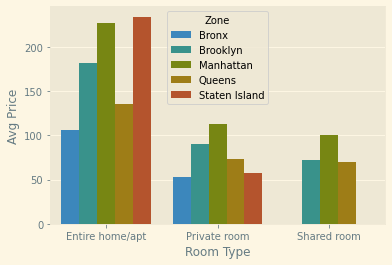

In [29]:
sns.barplot(x='room_type',  y='price', 
            hue='neighbourhood_group',data=avg_price)

plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.legend(title='Zone')

### 擁有房間數目最多的房東

In [30]:
data_index = data['host_id'].reset_index()  #房東編號
data_index.head()

,index,host_id
0,0,2787
1,1,2845
2,2,4632
3,3,4869
4,4,7192


In [31]:
data_index = data.groupby('host_id').size().sort_values(ascending=False).head().reset_index() #房東編號有多少 value_counts
data_index

,host_id,0
0,417504,28
1,1475015,11
2,6885157,8
3,7503643,7
4,2015914,6


In [32]:
pd.merge(data_index,
         data[['host_id','host_name']].drop_duplicates('host_id'),
         on='host_id')

,host_id,0,host_name
0,417504,28,The Box House Hotel
1,1475015,11,Mike
2,6885157,8,Randy
3,7503643,7,Vida
4,2015914,6,Majar


### 擁有房間租金總額最多的前10名房東

In [33]:
data_index = data.groupby('host_id')['price'].sum().sort_values(ascending=False).head(10).reset_index()
data_index

,host_id,price
0,417504,6962
1,836168,6000
2,213266,5000
3,4289240,4000
4,256239,3000
5,4751930,2500
6,605463,2300
7,2214774,1899
8,462379,1693
9,273174,1575


In [34]:
pd.merge(data_index,data[['host_id','host_name']].drop_duplicates('host_id'),on='host_id')

,host_id,price,host_name
0,417504,6962,The Box House Hotel
1,836168,6000,Henry
2,213266,5000,Jessica
3,4289240,4000,Lucy
4,256239,3000,Tracey
5,4751930,2500,Martin
6,605463,2300,West Village
7,2214774,1899,Ben And Jess
8,462379,1693,Loretta
9,273174,1575,Jon


### 那個區域比較熱門

In [35]:
data.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()

,neighbourhood_group,number_of_reviews
0,Manhattan,89873
1,Brooklyn,88805
2,Queens,14060
3,Bronx,3337
4,Staten Island,1536


In [36]:
data.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()

,neighbourhood,number_of_reviews
0,Williamsburg,21695
1,Harlem,17079
2,Bedford-Stuyvesant,16665
3,East Village,14448
4,Upper West Side,8119
5,Lower East Side,6089
6,Hell's Kitchen,6058
7,Crown Heights,5825
8,East Harlem,5628
9,Greenpoint,4982


In [37]:
subData = data.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()
subData

,neighbourhood_group,neighbourhood,number_of_reviews
0,Brooklyn,Williamsburg,21695
1,Manhattan,Harlem,17079
2,Brooklyn,Bedford-Stuyvesant,16665
3,Manhattan,East Village,14448
4,Manhattan,Upper West Side,8119
5,Manhattan,Lower East Side,6089
6,Manhattan,Hell's Kitchen,6058
7,Brooklyn,Crown Heights,5825
8,Manhattan,East Harlem,5628
9,Brooklyn,Greenpoint,4982


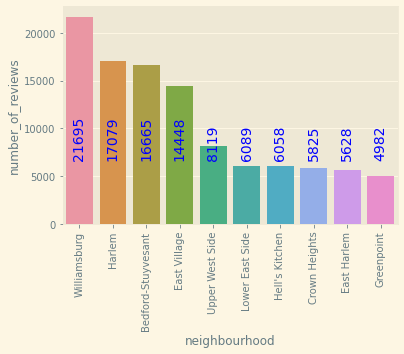

In [38]:
g = sns.barplot(x='neighbourhood',y='number_of_reviews',data=subData)
plt.xticks(rotation=90)
i = 0

for value in subData['number_of_reviews'].values:
    g.text(i, 7000, value, color='#0000FF', size=14, rotation= 90, ha="center")
    i += 1

## Example.2

> Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

這裡我們會使用[Seaborn包](http://seaborn.pydata.org/)提供的行星數據（參見[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)）。這個數據集提供了天文學家發現的其他恆星的行星的數據（被稱為太陽系外行星）。數據集可以簡單的使用一個Seaborn命令來下載：

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


> Pandas ``Series`` and ``DataFrame``s include all of the common aggregates mentioned in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb); in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

Pandas的`Series`和`DataFrame`包括了所有我們在[聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb)中介紹過的通用聚合操作；而且Pandas還提供了很方便的`describe()`可以用來對每個列計算這些通用的聚合結果。讓我們在行星數據集上使用這個函數，暫時先移除含有空值的行：

In [40]:
planets.describe()
#planets.dropna().describe()  

#year列，雖然第一顆太陽系外行星(min)是 1989 年發現的，但是一半的行星(50%)直到 2010 年以後才被發現的

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


> This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

這個例子展示了我們結合前面介紹過的多種操作之後，我們能在真實的數據集上完成多強大的操作。我們獲得了過去幾十年間我們是如何發現行星的大概統計。

In [41]:
# count discovered planets by method and by decade:
# 計算通過不同方法在不同年代發現的行星的個數：

decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


#### Iteration over groups 在分組上進行迭代

> The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

`GroupBy`對象支持在分組上直接進行迭代，每次迭代返回分組的一個`Series`或`DataFrame`對象：

In [42]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


> This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

這種做法在某些需要手動實現的情況下很有用，雖然通常來說使用內建的`apply`函數會快很多，我們馬上會介紹到`apply`函數。

#### Dispatch methods 擴展方法

> Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

通過一些Python面向對象的魔術技巧，任何非顯式定義在`GroupBy`對像上的方法，無論是`DataFrame`還是`Series`對象的，都可以給分組來調用。例如，你可以在數據分組上調用`DataFrame`的`describe()`方法，對所有分組進行通用的聚合運算：

譯者註：作者下面代碼多加了`unstack()`方法，應該是筆誤。

In [43]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


> Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

查看上表，能幫助我們更好的理解數據：例如，發現行星最多的方法是徑向速度和凌日法，雖然後者是近十年才變得普遍（因為新的更精準的望遠鏡的作用）。最新的方法應該是凌日時間變分法和軌道亮度調製法，它們直至2011年才開始發現新的行星。

## 額外補充

## == 地理圖 Folium == 
https://python-visualization.github.io/folium/

In [44]:
!pip install folium

In [45]:
import folium
from folium.plugins import HeatMap

m = folium.Map([40.7128,- 73.9160],zoom_start=11)       #zoom more

HeatMap(data[['latitude','longitude']].dropna(),
        radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

## DataFrame GroupBy & Style
SQL語法中的Group by 是欄位內的資料若有不只一筆名稱相同的資料的話，就會把它們作為群組 (Group)。然後通過使用GROUP BY,可以搭配聚合函數 (aggregation function) AVG()、COUNT()、MAX()、MIN()、SUM() 等這些內建函數對資料起作用，每一個群組都會傳回一個資料列。若沒有使用 GROUP BY，聚合函數針對一個 SELECT 查詢，只會返回一個彙總值。

groupby() function
Pandas DataFrame groupby() function is used to group rows that have the same values. It's mostly used with aggregate functions (count, sum, min, max, mean) to get the statistics based on one or more column values. Pandas gropuby() function is very similar to the SQL group by statement.

In [46]:
import numpy as np
import pandas as pd
rmlist = pd.DataFrame(np.random.randn(4, 5),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['one', 'two', 'three', 'four'])
rmlist

,a,b,c,d,e
one,-0.947664,-1.934849,0.661604,-0.860496,0.139975
two,0.541701,0.773071,-0.096609,1.043943,0.892647
three,0.129216,1.298420,1.584821,-1.084467,-0.566614
four,-0.207133,-0.861945,-0.784904,0.595756,-0.172338


In [47]:
dic_map = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
rmlist.groupby(by=dic_map, axis=1).sum()
#g_column.sum()

,blue,red
one,-0.198893,-2.742538
two,0.947333,2.207419
three,0.500354,0.861021
four,-0.189148,-1.241416


In [48]:
pd.Series(dic_map)

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

#### How To Group With Functions?

In [49]:
rmlist.groupby(len).sum()

,a,b,c,d,e
3,-0.405963,-1.161778,0.564994,0.183446,1.032622
4,-0.207133,-0.861945,-0.784904,0.595756,-0.172338
5,0.129216,1.298420,1.584821,-1.084467,-0.566614


In [50]:
key_list = ['one', 'one', 'one', 'two']
rmlist.groupby([len, key_list]).sum() 

,,a,b,c,d,e
3,one,-0.405963,-1.161778,0.564994,0.183446,1.032622
4,two,-0.207133,-0.861945,-0.784904,0.595756,-0.172338
5,one,0.129216,1.298420,1.584821,-1.084467,-0.566614


In [51]:
key_list = ['one', 'two', 'three', 'four']
rmlist.groupby([len, key_list]).sum() 

a         b         c         d         e
3 one   -0.947664 -1.934849  0.661604 -0.860496  0.139975
  two    0.541701  0.773071 -0.096609  1.043943  0.892647
4 four  -0.207133 -0.861945 -0.784904  0.595756 -0.172338
5 three  0.129216  1.298420  1.584821 -1.084467 -0.566614

#### How To Group by Index Level?

In [52]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'UK', 'RS', 'RS'],
                                    [1, 3, 5, 1, 3]],
                                    names=['city', 'tenor'])

hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

city         US                  UK        RS          
tenor         1         3         5         1         3
0      0.077715 -0.015856 -0.383093  0.205975  1.156248
1      0.235814  0.262145 -0.605256  1.327786  0.112278
2     -0.650904 -0.076228  0.371383  0.640152  1.983001
3      1.723089  0.125011 -1.298944 -1.679131  1.134756

In [53]:
hier_df.groupby(level='city', axis=1).count()

city,RS,UK,US
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2


## Data Aggregation
Aggregations refer to any data transformation that produces scalar values from arrays. Some common aggregation methods are: (still you can find many methods, these are just to illustrate)
* count ,sum ,mean ,median ,std, var ,min, max ,prod ,first, last

In [54]:
book = pd.read_csv(r'input/pd-books_discount.csv', encoding='latin')
book.head() 

,book_name,price,author,min_dis,max_dis,feedback
0,AAA,100,Author1,0.2,0.4,good
1,AAB,200,Author2,0.2,0.4,average
2,AAC,300,Author3,0.2,0.3,good
3,AAD,100,Author4,0.2,0.4,good
4,AAE,200,Author5,0.2,0.4,average


In [55]:
print(book['price'].min()); print(book['price'].max())

50
700


In [56]:
print(book['min_dis'].min()); print(book['max_dis'].min())

0.05
0.1


In [57]:
grouped = book.groupby(by=['feedback', 'author'], axis=0)

In [58]:
def max_min(arr):
    return arr.max(), arr.min()

grouped.agg(max_min)

book_name       price      min_dis      max_dis
feedback author                                                   
average  Author2  (AAS, AAB)  (500, 200)   (0.5, 0.1)  (0.55, 0.4)
         Author5  (AAK, AAE)  (500, 200)   (0.3, 0.2)  (0.4, 0.35)
good     Author1  (AAM, AAA)   (400, 50)   (0.3, 0.2)  (0.4, 0.35)
         Author3  (AAT, AAC)  (700, 200)  (0.3, 0.05)   (0.4, 0.1)
         Author4  (AAP, AAD)  (100, 100)   (0.3, 0.1)  (0.45, 0.3)
         Author6  (AAL, AAL)  (300, 300)   (0.4, 0.4)   (0.5, 0.5)

In [59]:
grouped.describe()

price                                                      \
                 count        mean         std    min    25%    50%    75%   
feedback author                                                              
average  Author2   5.0  260.000000  134.164079  200.0  200.0  200.0  200.0   
         Author5   2.0  350.000000  212.132034  200.0  275.0  350.0  425.0   
good     Author1   3.0  183.333333  189.296945   50.0   75.0  100.0  250.0   
         Author3   6.0  400.000000  200.000000  200.0  300.0  300.0  525.0   
         Author4   3.0  100.000000    0.000000  100.0  100.0  100.0  100.0   
         Author6   1.0  300.000000         NaN  300.0  300.0  300.0  300.0   

                        min_dis            ...             max_dis            \
                    max   count      mean  ...    75%  max   count      mean   
feedback author                            ...                                 
average  Author2  500.0     5.0  0.280000  ...  0.400  0.5     5.0  0.460000   
         Author5  500.0     2.0  0.250000  ...  0.275  0.3     2.0  0.375000   
good     Author1  400.0     3.0  0.266667  ...  0.300  0.3     3.0  0.383333   
         Author3  700.0     6.0  0.141667  ...  0.175  0.3     6.0  0.291667   
         Author4  100.0     3.0  0.200000  ...  0.250  0.3     3.0  0.383333   
         Author6  300.0     1.0  0.400000  ...  0.400  0.4     1.0  0.500000   

                                                               
                       std   min     25%    50%     75%   max  
feedback author                                                
average  Author2  0.065192  0.40  0.4000  0.450  0.5000  0.55  
         Author5  0.035355  0.35  0.3625  0.375  0.3875  0.40  
good     Author1  0.028868  0.35  0.3750  0.400  0.4000  0.40  
         Author3  0.102062  0.10  0.3000  0.300  0.3375  0.40  
         Author4  0.076376  0.30  0.3500  0.400  0.4250  0.45  
         Author6       NaN  0.50  0.5000  0.500  0.5000  0.50  

[6 rows x 24 columns]

#### How To Aggregate Column-wise and with Multiple Functions?

In [60]:
grouped = book.groupby(by=['feedback', 'author'])

In [61]:
grouped['price'].agg('min')

feedback  author 
average   Author2    200
          Author5    200
good      Author1     50
          Author3    200
          Author4    100
          Author6    300
Name: price, dtype: int64

In [62]:
grouped['price'].agg('max')

feedback  author 
average   Author2    500
          Author5    500
good      Author1    400
          Author3    700
          Author4    100
          Author6    300
Name: price, dtype: int64

In [63]:
grouped['price'].agg('mean')

feedback  author 
average   Author2    260.000000
          Author5    350.000000
good      Author1    183.333333
          Author3    400.000000
          Author4    100.000000
          Author6    300.000000
Name: price, dtype: float64

In [64]:
grouped['price'].agg(['min', 'max', 'mean', 'std'])

min  max        mean         std
feedback author                                   
average  Author2  200  500  260.000000  134.164079
         Author5  200  500  350.000000  212.132034
good     Author1   50  400  183.333333  189.296945
         Author3  200  700  400.000000  200.000000
         Author4  100  100  100.000000    0.000000
         Author6  300  300  300.000000         NaN

In [65]:
grouped['price'].agg([('min_value', 'min'), ('max_value', 'max'), 'mean', 'std'])

min_value  max_value        mean         std
feedback author                                               
average  Author2        200        500  260.000000  134.164079
         Author5        200        500  350.000000  212.132034
good     Author1         50        400  183.333333  189.296945
         Author3        200        700  400.000000  200.000000
         Author4        100        100  100.000000    0.000000
         Author6        300        300  300.000000         NaN

In [66]:
functions = [('min_value', 'min'), ('max_value', 'max'), 'mean', 'std']
result = grouped['price', 'max_dis'].agg(functions)
result

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6948/4234575327.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['price', 'max_dis'].agg(functions)


price                                     max_dis  \
                 min_value max_value        mean         std min_value   
feedback author                                                          
average  Author2       200       500  260.000000  134.164079      0.40   
         Author5       200       500  350.000000  212.132034      0.35   
good     Author1        50       400  183.333333  189.296945      0.35   
         Author3       200       700  400.000000  200.000000      0.10   
         Author4       100       100  100.000000    0.000000      0.30   
         Author6       300       300  300.000000         NaN      0.50   

                                                
                 max_value      mean       std  
feedback author                                 
average  Author2      0.55  0.460000  0.065192  
         Author5      0.40  0.375000  0.035355  
good     Author1      0.40  0.383333  0.028868  
         Author3      0.40  0.291667  0.102062  
         Author4      0.45  0.383333  0.076376  
         Author6      0.50  0.500000       NaN

In [67]:
result['price']

min_value  max_value        mean         std
feedback author                                               
average  Author2        200        500  260.000000  134.164079
         Author5        200        500  350.000000  212.132034
good     Author1         50        400  183.333333  189.296945
         Author3        200        700  400.000000  200.000000
         Author4        100        100  100.000000    0.000000
         Author6        300        300  300.000000         NaN

In [68]:
grouped = book.groupby(by=['feedback', 'author'], as_index=False).min()
grouped

,feedback,author,book_name,price,min_dis,max_dis
0,average,Author2,AAB,200,0.10,0.40
1,average,Author5,AAE,200,0.20,0.35
2,good,Author1,AAA,50,0.20,0.35
3,good,Author3,AAC,200,0.05,0.10
4,good,Author4,AAD,100,0.10,0.30
5,good,Author6,AAL,300,0.40,0.50


In [69]:
marks = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a', 'a'],
                      'key2' : ['one', 'two', 'one', 'two', 'one', 'one'],
                     'data1' : np.arange(10, 16),
                     'data2' : np.arange(16, 22)})
marks

,key1,key2,data1,data2
0,a,one,10,16
1,a,two,11,17
2,b,one,12,18
3,b,two,13,19
4,a,one,14,20
5,a,one,15,21


In [70]:
grouped = marks['data1'].groupby(by=marks['key1']).mean()
grouped

key1
a    12.5
b    12.5
Name: data1, dtype: float64

In [71]:
print('a mean:', (10 + 11 + 14 + 15) / 4)
print('b mean:', (12 + 13)/2)

a mean: 12.5
b mean: 12.5


In [72]:
group_tk = marks['data1'].groupby(by=[marks['key1'], marks['key2']])
print(marks)
print()
print('result:', group_tk.mean())

  key1 key2  data1  data2
0    a  one     10     16
1    a  two     11     17
2    b  one     12     18
3    b  two     13     19
4    a  one     14     20
5    a  one     15     21

result: key1  key2
a     one     13.0
      two     11.0
b     one     12.0
      two     13.0
Name: data1, dtype: float64


In [73]:
group_tk.mean().unstack()

key2,one,two
key1,,
a,13.0,11.0
b,12.0,13.0


In [74]:
feedb = np.array(['good', 'avg', 'good', 'avg', 'good', 'avg'])
actual = np.array(['good', 'med', 'good', 'med', 'good', 'med'])
mean1 = marks['data1'].groupby(by=[feedb, actual]).mean()
mean1

avg   med     13.0
good  good    12.0
Name: data1, dtype: float64

In [75]:
mean_df = marks.groupby(by=['key1']).mean()
mean_df

,data1,data2
key1,,
a,12.5,18.5
b,12.5,18.5


In [76]:
print(marks)
print()
marks.groupby(by=['key1', 'key2']).size()

  key1 key2  data1  data2
0    a  one     10     16
1    a  two     11     17
2    b  one     12     18
3    b  two     13     19
4    a  one     14     20
5    a  one     15     21



key1  key2
a     one     3
      two     1
b     one     1
      two     1
dtype: int64

## Iterate

In [77]:
for key_name, group_name in marks.groupby(by='key1'):
    print(key_name)
    print(group_name)
    print(type(key_name))
    print(type(group_name))

a
  key1 key2  data1  data2
0    a  one     10     16
1    a  two     11     17
4    a  one     14     20
5    a  one     15     21
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
b
  key1 key2  data1  data2
2    b  one     12     18
3    b  two     13     19
<class 'str'>
<class 'pandas.core.frame.DataFrame'>


In [78]:
grouped = marks.groupby(marks.dtypes, axis=1)
for datatype, group in grouped:
    print(datatype)
    print(group)

int64
   data1  data2
0     10     16
1     11     17
2     12     18
3     13     19
4     14     20
5     15     21
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one
5    a  one


In [79]:
print(marks['data1'])
print(marks[['data1', 'data2']]) 

0    10
1    11
2    12
3    13
4    14
5    15
Name: data1, dtype: int64
   data1  data2
0     10     16
1     11     17
2     12     18
3     13     19
4     14     20
5     15     21


In [80]:
marks['data1'].groupby(by=marks['key1']).sum()

key1
a    50
b    25
Name: data1, dtype: int64

In [81]:
marks[['data1', 'data2']].groupby(by=marks['key2']).sum()

,data1,data2
key2,,
one,51,75
two,24,36


## Project - vgsales

In [82]:
import numpy as np
import pandas as pd
data = pd.read_excel("input/plt-vgsales.xlsx")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [83]:
data.groupby('Genre').size()                 #預設會忽略Nan
#data.groupby('Genre',dropna=False).size()   #加上 dropna=False 來強制不忽略
#data.groupby(['Year','Platform']).size()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64

In [84]:
#data.groupby(['Year','Platform']).sum().head()
data.groupby(['Year','Platform']).sum().reset_index() #表頭索引

,Year,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,2600.0,29826.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,2600.0,190488.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,2600.0,149186.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,2600.0,49355.0,5.44,0.34,0.00,0.06,5.83
4,1983.0,NES,7404.0,2.32,0.46,8.10,0.08,10.96
...,...,...,...,...,...,...,...,...
236,2016.0,X360,93657.0,0.36,0.40,0.00,0.07,0.83
237,2016.0,XOne,584548.0,6.69,4.63,0.01,1.05,12.37
238,2017.0,PS4,14393.0,0.00,0.00,0.03,0.00,0.03
239,2017.0,PSV,32685.0,0.00,0.00,0.02,0.00,0.02


In [85]:
lists = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']   #獨立設立 metrics
data.groupby(['Year','Platform'])[lists].sum().head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year   Platform                                           
1980.0 2600.0       10.59      0.67       0.0         0.12
1981.0 2600.0       33.40      1.96       0.0         0.32
1982.0 2600.0       26.92      1.65       0.0         0.31
1983.0 2600.0        5.44      0.34       0.0         0.06
       NES           2.32      0.46       8.1         0.08

In [86]:
data.groupby('Platform').get_group('Wii')
#data[data['Platform'] == 'Wii']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8.0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9.0,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16517,16520.0,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555.0,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576.0,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577.0,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


## iloc

In [87]:
data.groupby('Year').size().head()   #1980年有 9個資料

Year
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
dtype: int64

In [88]:
x = data.groupby('Year').groups  # 1980: [258, 544, 1766, 1969, 2669, 4025, 5366, 6317, 6896]
x

{1980.0: [258, 544, 1766, 1969, 2669, 4025, 5366, 6317, 6896], 1981.0: [239, 734, 766, 864, 1106, 1153, 1306, 1429, 1556, 1848, 1965, 2143, 2232, 2516, 2596, 2664, 2806, 2940, 3044, 3403, 3408, 4015, 4139, 4346, 4402, 4517, 4784, 4908, 4967, 5127, 5246, 5389, 5400, 5564, 5800, 6021, 6537, 6866, 6940, 7148, 7150, 7184, 7371, 7904, 8459, 9495], 1982.0: [89, 1115, 1163, 1705, 1817, 1851, 1905, 2406, 2629, 2660, 2843, 3079, 3215, 3248, 3266, 3447, 3643, 3716, 3748, 3966, 4013, 4016, 4801, 4894, 5064, 5381, 5395, 5658, 5773, 6145, 6265, 6728, 7149, 8458, 8758, 9106], 1983.0: [421, 700, 763, 1508, 1809, 1839, 1861, 2652, 2672, 3953, 4096, 4267, 4780, 5382, 5559, 6007, 8457], 1984.0: [9, 277, 298, 754, 938, 1233, 1234, 1324, 1560, 1638, 1857, 2513, 2955, 6296], 1985.0: [1, 374, 868, 1260, 1490, 1973, 2020, 2059, 2259, 3907, 4337, 4727, 14335, 15867], 1986.0: [127, 452, 548, 573, 611, 737, 867, 992, 1117, 1262, 1427, 1623, 1675, 1676, 1772, 1791, 1971, 2158, 3532, 5082, 5956], 1987.0: [251, 46

In [89]:
data.iloc[x[1980.0]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259.0,Asteroids,2600.0,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545.0,Missile Command,2600.0,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768.0,Kaboom!,2600.0,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971.0,Defender,2600.0,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671.0,Boxing,2600.0,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027.0,Ice Hockey,2600.0,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368.0,Freeway,2600.0,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319.0,Bridge,2600.0,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898.0,Checkers,2600.0,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


## Aggregation : agg()

聚合函數 (aggregation function) 也就是 AVG()、COUNT()、MAX()、MIN()、SUM() 等這些內建函數對資料起作用 Aggregating functions are the ones that reduce the dimension of the returned objects.Some common aggregating functions are tabulated below:
<table class="colwidths-given table">
<colgroup>
<col style="width: 20%">
<col style="width: 80%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Function</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mean()</span></code></p></td>
<td><p>Compute mean of groups</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">sum()</span></code></p></td>
<td><p>Compute sum of group values</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">size()</span></code></p></td>
<td><p>Compute group sizes</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">count()</span></code></p></td>
<td><p>Compute count of group</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">std()</span></code></p></td>
<td><p>Standard deviation of groups</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">var()</span></code></p></td>
<td><p>Compute variance of groups</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">sem()</span></code></p></td>
<td><p>Standard error of the mean of groups</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">describe()</span></code></p></td>
<td><p>Generates descriptive statistics</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">first()</span></code></p></td>
<td><p>Compute first of group values</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">last()</span></code></p></td>
<td><p>Compute last of group values</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">nth()</span></code></p></td>
<td><p>Take nth value, or a subset if n is a list</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">min()</span></code></p></td>
<td><p>Compute min of group values</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">max()</span></code></p></td>
<td><p>Compute max of group values</p></td>
</tr>
</tbody>
</table>

In [90]:
data.groupby('Platform').sum().head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
2600.0,585665.0,229928.0,90.60,5.47,0.00,0.91,97.08
3DO,43118.0,5984.0,0.00,0.00,0.10,0.00,0.10
3DS,4662644.0,1006531.0,78.87,58.52,97.35,12.63,247.46
DC,456114.0,103997.0,5.43,1.69,8.56,0.27,15.97
DS,20845831.0,4283493.0,390.71,194.65,175.57,60.53,822.49


In [91]:
## 寫法1
data.groupby('Platform')[['NA_Sales','Global_Sales']].aggregate([np.sum,
                                                                 np.max,
                                                                 np.min]).head()

NA_Sales              Global_Sales             
              sum   amax  amin          sum   amax  amin
Platform                                                
2600.0      90.60   7.28  0.07        97.08   7.81  0.07
3DO          0.00   0.00  0.00         0.10   0.06  0.02
3DS         78.87   5.17  0.00       247.46  14.35  0.01
DC           5.43   1.26  0.00        15.97   2.42  0.02
DS         390.71  11.38  0.00       822.49  30.01  0.01

In [92]:
## 寫法2
def sum1(x): return np.sum(x)
def max1(x): return np.max(x)   
def min1(x): return np.min(x)   
data.groupby('Platform')[['NA_Sales','Global_Sales']].aggregate([sum1,
                                                                 max1,
                                                                 min1]).head()
#return np.max(x) - np.min(x)  #return np.median(x) - np.mean(x)

NA_Sales              Global_Sales             
             sum1   max1  min1         sum1   max1  min1
Platform                                                
2600.0      90.60   7.28  0.07        97.08   7.81  0.07
3DO          0.00   0.00  0.00         0.10   0.06  0.02
3DS         78.87   5.17  0.00       247.46  14.35  0.01
DC           5.43   1.26  0.00        15.97   2.42  0.02
DS         390.71  11.38  0.00       822.49  30.01  0.01

In [93]:
# data.groupby('Platform')[['NA_Sales','Global_Sales']].aggregate(
#     [lambda x: x.max() - x.min(),
#     lambda x: x.median() - x.mean()]
# )

## Transform ＆ Apply & Filter

In [94]:
data.groupby('Platform')['Global_Sales'].transform(sum)

0         926.71
1         251.07
2         926.71
3         926.71
4         255.45
          ...   
16593     318.50
16594     199.36
16595    1255.64
16596     822.49
16597     318.50
Name: Global_Sales, Length: 16598, dtype: float64

In [95]:
data2 = data.copy()

In [96]:
#方法 1
global_sum = data2.groupby('Platform')['Global_Sales'].transform(np.sum)  # cal Global_Sales.sum
data2['銷售佔比'] = data2['Global_Sales'] / global_sum 
data2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,銷售佔比
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.089284
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.160274
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.038653
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.035610
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.122803


In [97]:
data2 = data.copy()

In [98]:
#方法 2 使用apply來達成等同上面的功能
def rate(x):
    x['銷售佔比'] = x['Global_Sales'] / x['Global_Sales'].sum()
    return x
data2.groupby('Platform').apply(rate).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,銷售佔比
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.089284
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.160274
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.038653
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.035610
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.122803


In [99]:
# filter : 列出該平台總銷售額大於 1000 百萬的遊戲
index = data.groupby('Platform')['Global_Sales'].transform(sum) > 1000
data[index]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18.0,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25.0,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29.0,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39.0,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48.0,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...
16559,16562.0,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16561,16564.0,Kanokon: Esuii,PS2,2008.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16572,16575.0,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16580,16583.0,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


## Project - employee 

In [100]:
import pandas as pd
data = pd.read_csv('input/pd-employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [101]:
# grouping the data by department
data.groupby(['Department']).agg({'Age':'mean',
                                  'DailyRate':'max'})

,Age,DailyRate
Department,,
Human Resources,37.809524,1444
Research & Development,37.042664,1496
Sales,36.542601,1499


In [102]:
data[['Age','DailyRate','Department']].groupby([data['Department'],
                                                data['EducationField']]).agg(['mean',
                                                                              'median',
                                                                              'min',
                                                                              'max',
                                                                              'std',
                                                                              'var'])

Age                            \
                                              mean median min max        std   
Department             EducationField                                          
Human Resources        Human Resources   37.037037   36.0  24  59   8.604478   
                       Life Sciences     39.375000   41.0  26  56   9.076527   
                       Medical           39.846154   42.0  24  59  11.312575   
                       Other             34.666667   37.0  29  38   4.932883   
                       Technical Degree  32.500000   34.5  19  42   9.678154   
Research & Development Life Sciences     36.997727   36.0  18  60   8.937775   
                       Medical           37.242424   36.0  18  60   9.471776   
                       Other             36.187500   35.5  21  53   7.869723   
                       Technical Degree  37.063830   35.5  20  58  10.039501   
Sales                  Life Sciences     37.186667   36.0  20  59   8.683384   
                       Marketing         37.924528   36.0  18  60   9.153783   
                       Medical           34.727273   34.0  18  58   8.993902   
                       Other             32.000000   31.0  19  50   8.237545   
                       Technical Degree  33.941176   33.0  19  59   8.960997   

                                                       DailyRate               \
                                                var         mean  median  min   
Department             EducationField                                           
Human Resources        Human Resources    74.037037   675.259259   600.0  106   
                       Life Sciences      82.383333   753.062500   709.0  176   
                       Medical           127.974359   875.615385   898.0  179   
                       Other              24.333333  1005.000000  1239.0  332   
                       Technical Degree   93.666667   667.000000   536.0  489   
Research & Development Life Sciences      79.883822   789.195455   786.5  102   
                       Medical            89.714549   825.730028   878.0  109   
                       Other              61.932540   763.359375   669.0  116   
                       Technical Degree  100.791581   846.202128   945.5  128   
Sales                  Life Sciences      75.401163   854.580000   880.0  111   
                       Marketing          83.791736   727.836478   685.0  118   
                       Medical            80.890282   802.909091   750.0  120   
                       Other              67.857143   893.600000   959.0  141   
                       Technical Degree   80.299465   851.470588   924.5  107   

                                                                          
                                          max         std            var  
Department             EducationField                                     
Human Resources        Human Resources   1420  436.471657  190507.507123  
                       Life Sciences     1383  448.447465  201105.129167  
                       Medical           1398  382.294289  146148.923077  
                       Other             1444  591.779520  350203.000000  
                       Technical Degree  1107  294.241397   86578.000000  
Research & Development Life Sciences     1490  402.796260  162244.827314  
                       Medical           1495  398.918343  159135.844041  
                       Other             1474  398.990089  159193.091022  
                       Technical Degree  1496  416.608570  173562.700641  
Sales                  Life Sciences     1498  395.281096  156247.144564  
                       Marketing         1499  394.040573  155267.973091  
                       Medical           1476  384.866080  148121.899687  
                       Other             1474  468.130446  219146.114286  
                       Technical Degree  1496  458.406941  210136.923351

In [103]:
#pd.set_option('max_rows',1470)

def above_thousand(x):
    color = 'red' if x>1000 else 'green'
    return 'color: %s' % color

data[['DailyRate']].head().style.applymap(above_thousand)

,DailyRate
0,1102
1,279
2,1373
3,1392
4,591


In [104]:
dt1 = data.groupby(['Department','EducationField'])[['Age','DailyRate','MonthlyIncome']].agg('mean')
dt1

Age    DailyRate  MonthlyIncome
Department             EducationField                                         
Human Resources        Human Resources   37.037037   675.259259    7241.148148
                       Life Sciences     39.375000   753.062500    6914.062500
                       Medical           39.846154   875.615385    6594.076923
                       Other             34.666667  1005.000000    5016.666667
                       Technical Degree  32.500000   667.000000    3081.250000
Research & Development Life Sciences     36.997727   789.195455    6179.984091
                       Medical           37.242424   825.730028    6539.223140
                       Other             36.187500   763.359375    6278.687500
                       Technical Degree  37.063830   846.202128    5760.819149
Sales                  Life Sciences     37.186667   854.580000    7246.233333
                       Marketing         37.924528   727.836478    7348.584906
                       Medical           34.727273   802.909091    6377.227273
                       Other             32.000000   893.600000    5398.733333
                       Technical Degree  33.941176   851.470588    6066.294118

In [105]:
dt1.style.highlight_max(color = 'red').highlight_min(color='lightgreen')

In [106]:
# grouped the data by education field
dt2 = data.groupby(['EducationField'])[['Age','DailyRate','HourlyRate','MonthlyIncome']].agg('mean')
dt2

,Age,DailyRate,HourlyRate,MonthlyIncome
EducationField,,,,
Human Resources,37.037037,675.259259,60.888889,7241.148148
Life Sciences,37.107261,804.425743,66.831683,6463.288779
Marketing,37.924528,727.836478,66.150943,7348.584906
Medical,36.838362,822.799569,65.280172,6510.036638
Other,35.365854,796.024390,62.365854,6071.548780
Technical Degree,36.121212,842.128788,66.621212,5758.303030


In [107]:
dt2.style.highlight_max(color = 'darkgreen').highlight_min(color = 'yellow')

,Age,DailyRate,HourlyRate,MonthlyIncome
EducationField,,,,
Human Resources,37.037037,675.259259,60.888889,7241.148148
Life Sciences,37.107261,804.425743,66.831683,6463.288779
Marketing,37.924528,727.836478,66.150943,7348.584906
Medical,36.838362,822.799569,65.280172,6510.036638
Other,35.365854,796.024390,62.365854,6071.548780
Technical Degree,36.121212,842.128788,66.621212,5758.303030


In [108]:
# highlighting the range of values using background_gradient
dt2.style.background_gradient(cmap = 'Greens')

,Age,DailyRate,HourlyRate,MonthlyIncome
EducationField,,,,
Human Resources,37.037037,675.259259,60.888889,7241.148148
Life Sciences,37.107261,804.425743,66.831683,6463.288779
Marketing,37.924528,727.836478,66.150943,7348.584906
Medical,36.838362,822.799569,65.280172,6510.036638
Other,35.365854,796.024390,62.365854,6071.548780
Technical Degree,36.121212,842.128788,66.621212,5758.303030


In [109]:
# method chains to hide the index as well
dt2.style.background_gradient(cmap = 'Greens').hide_index()

Age,DailyRate,HourlyRate,MonthlyIncome
37.037037,675.259259,60.888889,7241.148148
37.107261,804.425743,66.831683,6463.288779
37.924528,727.836478,66.150943,7348.584906
36.838362,822.799569,65.280172,6510.036638
35.365854,796.024390,62.365854,6071.548780
36.121212,842.128788,66.621212,5758.303030


In [110]:
import numpy as np
import pandas as pd

# creating a data frame
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan
df

,A,B,C,D,E
0,1.0,1.983330,NaN,-0.318708,0.315799
1,2.0,-0.496489,-0.935077,1.093833,0.043788
2,3.0,0.077118,-0.585614,0.516776,0.211498
3,4.0,-0.000683,-0.894971,NaN,-1.154966
4,5.0,0.156203,0.296267,0.279668,-0.733014
5,6.0,-0.580498,0.466711,1.036635,-1.105214
6,7.0,0.131499,0.444228,-0.397086,-2.388394
7,8.0,-0.737920,0.124069,-0.256379,0.018435
8,9.0,2.220903,0.950008,0.819129,0.400128
9,10.0,0.384587,-0.686190,0.014542,-0.588376


In [111]:
# highligting null values
df.style.highlight_null(null_color = 'yellow')

,A,B,C,D,E
0,1.000000,1.983330,nan,-0.318708,0.315799
1,2.000000,-0.496489,-0.935077,1.093833,0.043788
2,3.000000,0.077118,-0.585614,0.516776,0.211498
3,4.000000,-0.000683,-0.894971,nan,-1.154966
4,5.000000,0.156203,0.296267,0.279668,-0.733014
5,6.000000,-0.580498,0.466711,1.036635,-1.105214
6,7.000000,0.131499,0.444228,-0.397086,-2.388394
7,8.000000,-0.737920,0.124069,-0.256379,0.018435
8,9.000000,2.220903,0.950008,0.819129,0.400128
9,10.000000,0.384587,-0.686190,0.014542,-0.588376


In [112]:
df.style.background_gradient(cmap = 'Greens')

,A,B,C,D,E
0,1.000000,1.983330,nan,-0.318708,0.315799
1,2.000000,-0.496489,-0.935077,1.093833,0.043788
2,3.000000,0.077118,-0.585614,0.516776,0.211498
3,4.000000,-0.000683,-0.894971,nan,-1.154966
4,5.000000,0.156203,0.296267,0.279668,-0.733014
5,6.000000,-0.580498,0.466711,1.036635,-1.105214
6,7.000000,0.131499,0.444228,-0.397086,-2.388394
7,8.000000,-0.737920,0.124069,-0.256379,0.018435
8,9.000000,2.220903,0.950008,0.819129,0.400128
9,10.000000,0.384587,-0.686190,0.014542,-0.588376


In [113]:
df.style.bar(color = 'skyblue')

,A,B,C,D,E
0,1.000000,1.983330,nan,-0.318708,0.315799
1,2.000000,-0.496489,-0.935077,1.093833,0.043788
2,3.000000,0.077118,-0.585614,0.516776,0.211498
3,4.000000,-0.000683,-0.894971,nan,-1.154966
4,5.000000,0.156203,0.296267,0.279668,-0.733014
5,6.000000,-0.580498,0.466711,1.036635,-1.105214
6,7.000000,0.131499,0.444228,-0.397086,-2.388394
7,8.000000,-0.737920,0.124069,-0.256379,0.018435
8,9.000000,2.220903,0.950008,0.819129,0.400128
9,10.000000,0.384587,-0.686190,0.014542,-0.588376


<!--NAVIGATION-->
< [组合数据集：Merge 和 Join](03.07-Merge-and-Join.ipynb) | [目录](Index.ipynb) | [数据透视表](03.09-Pivot-Tables.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
